# Predicting heart disease using machine learning

In this notebook we are going to build a machine learning classifier which is able to predict if a person has a heart disease or not
based on his/her medical attributes.

Our Approach is :
1.Problem  defination
2.data
3.evaluation
4.features
5.modelling
6.experimentation

## 1.Problem Defination
> we are going to build a binary classifier which predicts a person has a heart disease or not based on clinical reports

## 2.data
this original dataset is taken from cleavland database from uci machine learning repository.
https://archive.ics.uci.edu/dataset/45/heart+disease.

there is also a version of this dataset is available on kaggle.
https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data.

## 3.evaluation
> if we get an accuracy of 95% then this project is declared has success

## 4.features 
the information about the features

**data dictionary**
* 1.age - age in years
* 2.sex - (1 = male; 0 = female)
* 3.cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
* 4.trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
* 5.chol - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
* 6.fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
* 7.restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
* 8.thalach - maximum heart rate achieved
* 9.exang - exercise induced angina (1 = yes; 0 = no)
* 10.oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
* 11.slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
* 12.ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
* 13.thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
* 14.target - have disease or not (1=yes, 0=no) (= the predicted attribute)

## preparing the tools

* we are going to use pandas,matplotlib and numopy for data analysis and manipulation

In [2]:
# impprting the tools

# for regular EDA(exploratory data analysis)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#because we want all our plots to be insode the notebook
%matplotlib inline 

# importing the models from Scikit Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn import tree
from sklearn import naive_bayes

# Model evalutions
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report  
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

## Load data

In [3]:
df = pd.read_csv("heart-disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [68]:
df.shape

(303, 14)

## data Exploration 

In [69]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [70]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [71]:
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

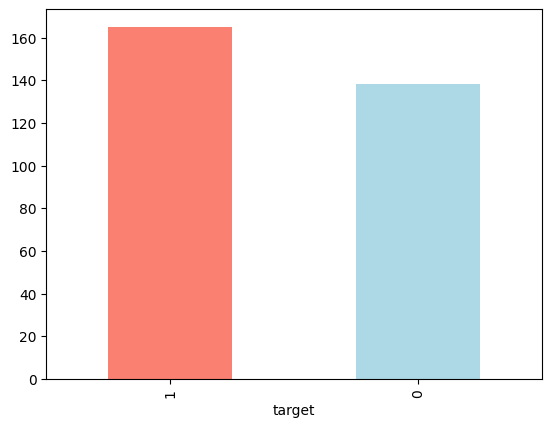

In [72]:
df['target'].value_counts().plot(kind='bar',color=['salmon','lightblue']);

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [74]:
df.isna()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [75]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [76]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Finding Patterns

In [77]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [78]:
#compare the target attribute with the sex attribute
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

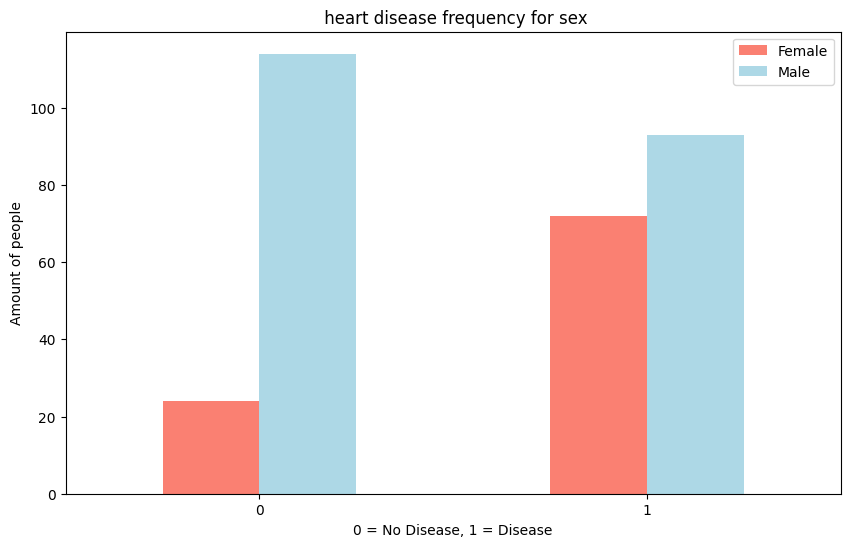

In [79]:
#plot the crosstab
pd.crosstab(df.target, df.sex).plot(
    kind='bar',figsize=(10,6),color=['salmon','lightblue']
);
plt.title(" heart disease frequency for sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount of people")
plt.legend(["Female","Male"])
plt.xticks(rotation=0)

## age , max heartrate(thalach) and target

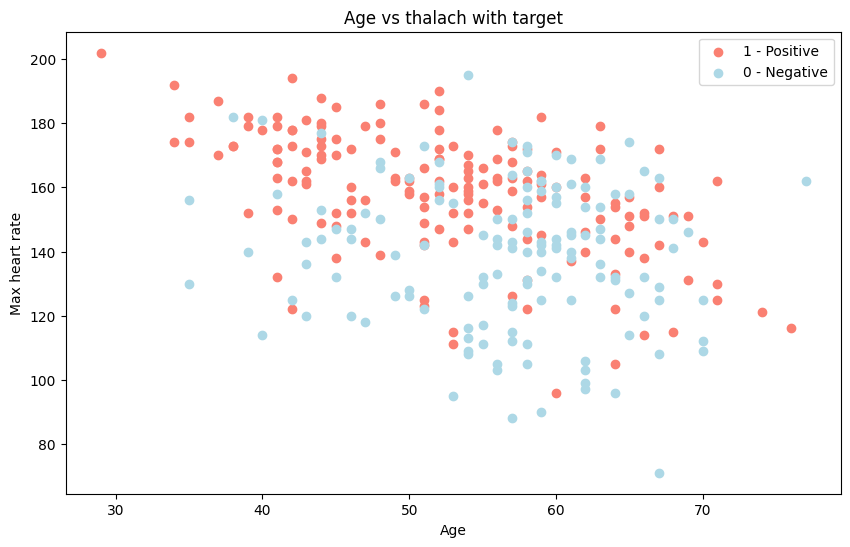

In [80]:
plt.figure(figsize=(10,6))

# Age vs thalach  with positive examples 
plt.scatter(df.age[df.target == 1],df.thalach[df.target == 1],c='salmon');

# Age vs thalach with negative examples
plt.scatter(df.age[df.target == 0],df.thalach[df.target == 0],c='lightblue');

plt.title("Age vs thalach with target")
plt.xlabel("Age")
plt.ylabel("Max heart rate")
plt.legend(['1 - Positive','0 - Negative']);

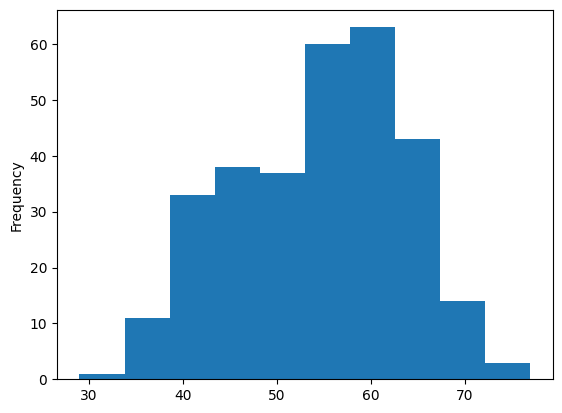

In [81]:
# the distribution of age with histogram
df.age.plot.hist();

### cp(chest pain and target)

In [82]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


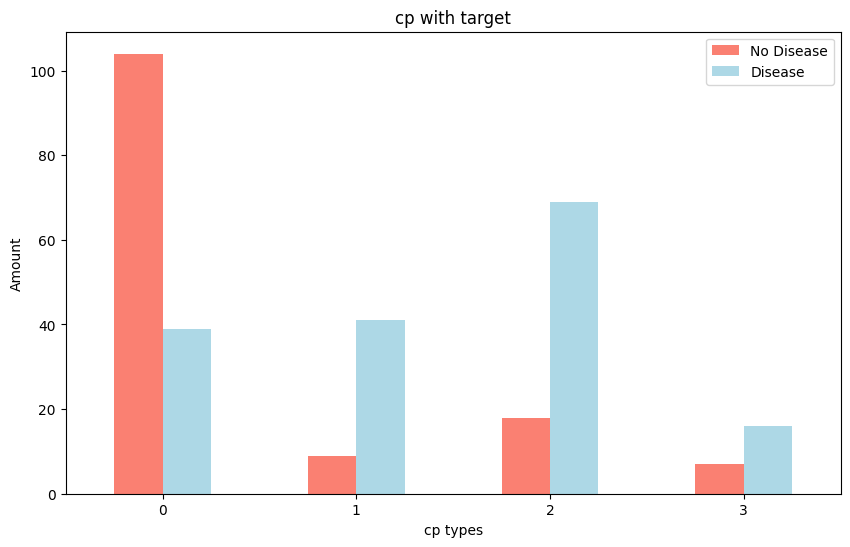

In [83]:
pd.crosstab(df.cp, df.target).plot(
    kind='bar',
    figsize=(10,6),
    color=['salmon','lightblue']
);

plt.title("cp with target")
plt.xlabel("cp types")
plt.ylabel("Amount")
plt.legend(["No Disease","Disease"])
plt.xticks(rotation=0);

In [84]:
# correlation matrix 
df.corr(method='pearson')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


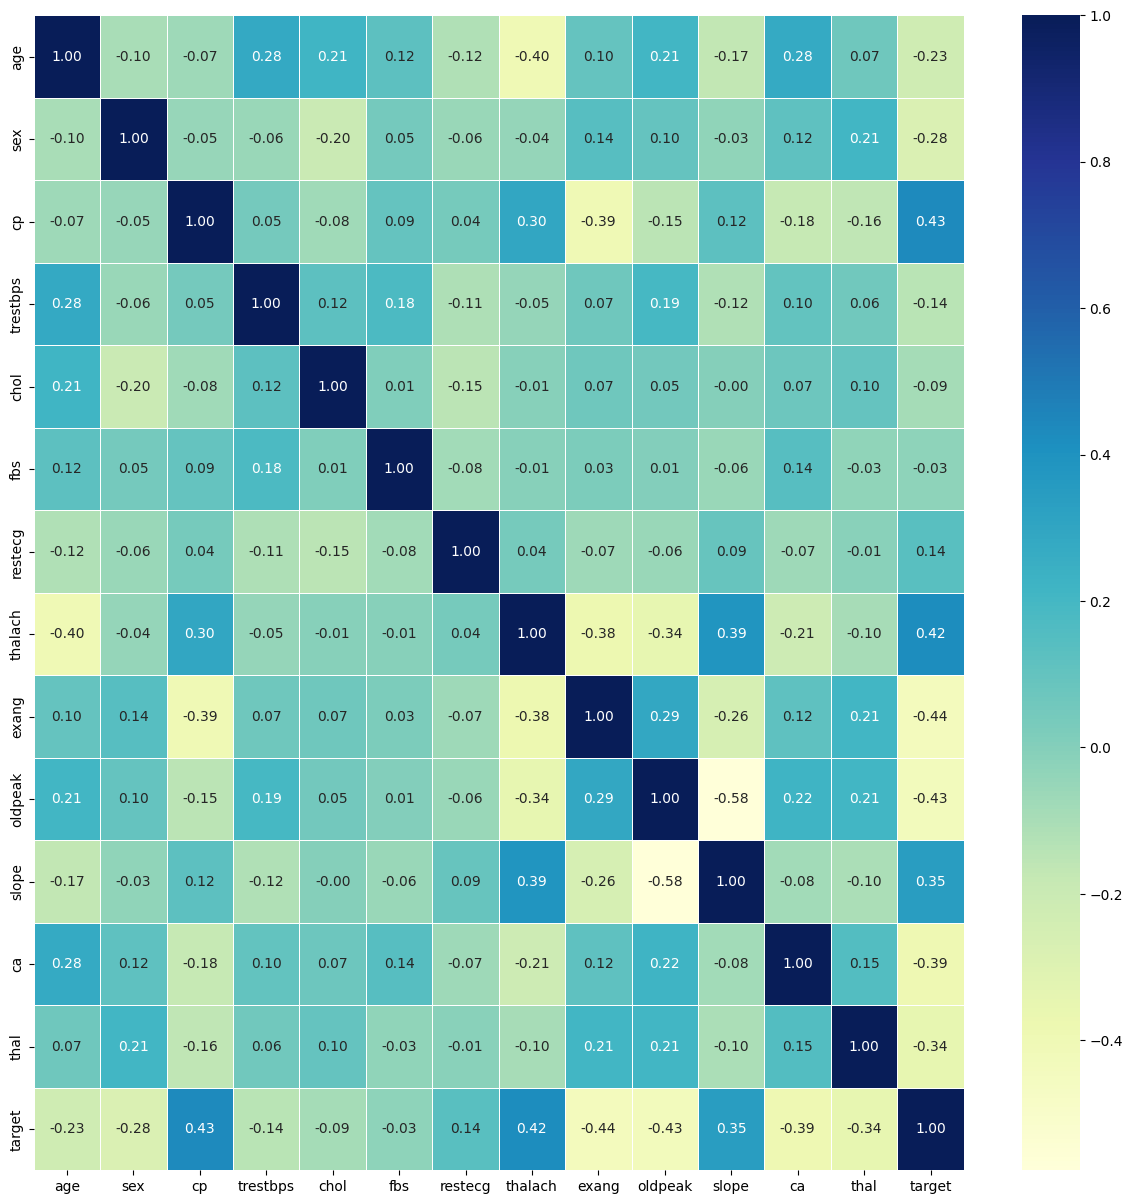

In [85]:
# plotting  the correlation matrix with sns heatmap
correlation_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(correlation_matrix,
           annot=True,
           linewidths=0.5,
           fmt='.2f',
           cmap='YlGnBu');

In [86]:
 pd.crosstab(df.fbs, df.target)

target,0,1
fbs,,
0,116,142
1,22,23


## Modelling

In [7]:
# splitting the data
X = df.drop(['target'],axis=1)
y = df['target']

In [8]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [9]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [10]:
 # splitting into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [11]:
y_test.value_counts()

target
1    32
0    29
Name: count, dtype: int64

In [12]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [13]:
y_train

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

## models we are going to use

* 1.Logistic Regression
* 2.K-Nearest Neigbors Classifier
* 3.Random Forest Classifier
* svm
* DecisionTreeClassifier
* NaiveBayesClassifier

In [14]:
models = {
    "LogisticRegression":LogisticRegression(),
    "KNeighborsClassifier":KNeighborsClassifier(),
    "RandomForestClassifier":RandomForestClassifier(),
    "svm":svm.SVC(),
    "NaiveBayesClassifier":naive_bayes.GaussianNB()
}

#function to train and evaluvate the models
def fit_and_score(models,X_train,X_test,y_train,y_test):
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train,y_train)
        model_scores[name] = model.score(X_test,y_test)
    return model_scores

In [15]:
model_scores = fit_and_score(models,X_train,X_test,y_train,y_test)
model_scores

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'LogisticRegression': 0.8852459016393442,
 'KNeighborsClassifier': 0.6885245901639344,
 'RandomForestClassifier': 0.8360655737704918,
 'svm': 0.7049180327868853,
 'NaiveBayesClassifier': 0.8688524590163934}

## Model Comparision

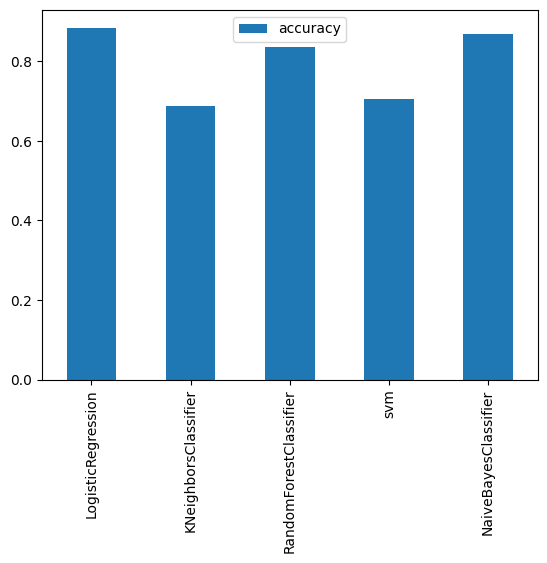

In [16]:
model_compare = pd.DataFrame(model_scores,index=['accuracy'])
model_compare.T.plot.bar();

## Hyperparameter tuning with RandomizedSearchCV

### KNN

In [17]:
train_scores = []
test_scores = []

neighbors = range(1,21,2)

knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train,y_train)
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

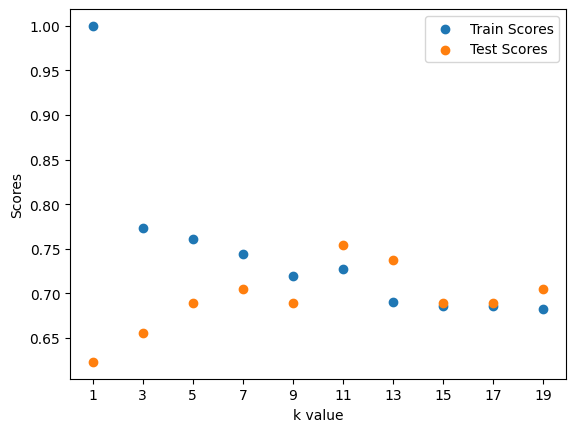

In [18]:
plt.scatter(neighbors,train_scores)
plt.scatter(neighbors,test_scores)
plt.ylabel("Scores")
plt.xlabel("k value")
plt.xticks(range(1,21,2))
plt.legend(['Train Scores','Test Scores'])
plt.show()

### Logistic Regression and Random Forests

In [19]:
log_reg_grid = {
    "C":np.logspace(-4,4,20),
    "solver":['liblinear','saga']
}

ran_for_grid = {
    'n_estimators':np.arange(10,1000,50),
    "max_depth":[None,3,5,10],
    "min_samples_split":np.arange(2,20,2),
    "min_samples_leaf":np.arange(1,20,2)
}

In [20]:
# tuning LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               random_state=42,
                               verbose=True)

In [21]:
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The ma

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear', 'saga']},
                   random_state=42, verbose=True)

In [22]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [23]:
rs_log_reg.score(X_test,y_test)

0.8852459016393442

In [24]:
# tuning RandomForestClassifier

In [25]:
rs_ran_for = RandomizedSearchCV(RandomForestClassifier(),
                               param_distributions=ran_for_grid,
                               cv=5,
                               n_iter=20,
                               random_state=42,
                               verbose=True)

In [28]:
rs_ran_for.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   random_state=42, verbose=True)

In [29]:
rs_ran_for.best_params_

{'n_estimators': 510,
 'min_samples_split': 18,
 'min_samples_leaf': 19,
 'max_depth': 5}

In [30]:
rs_ran_for.score(X_test,y_test)

0.8688524590163934

## hyperparameter tuning using GridSearchCV

In [31]:
log_reg_grid = {
    "C":np.logspace(-4,4,30),
    "solver":['liblinear']
}

gs_log_reg = GridSearchCV(LogisticRegression(),
                           param_grid = log_reg_grid,
                           cv=5,
                           verbose=True)

In [32]:
gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [33]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [34]:
gs_log_reg.score(X_test,y_test)

0.8852459016393442

## Evaluating the tuned model

## Evaluating the tuned model

In [37]:
# making predictions with the tuned model
y_preds = gs_log_reg.predict(X_test)

In [38]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [39]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

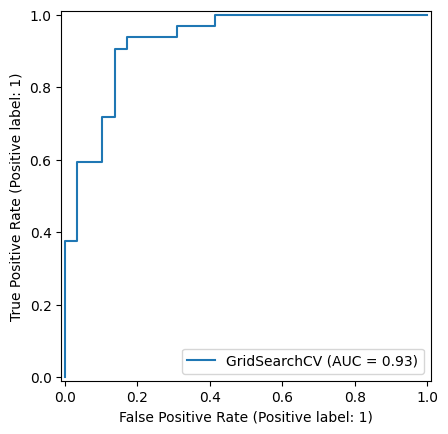

In [41]:
#plotting the ROC curve and calculating the AUC
RocCurveDisplay.from_estimator(gs_log_reg,X_test,y_test);

In [42]:
# confusion matrix
print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


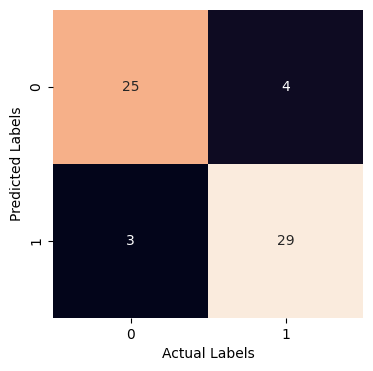

In [45]:
# plotting the confusion matrix with seaborn
def plot_con_matrix(y_test,y_preds):
    fig , ax = plt.subplots(figsize=(4,4))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),
                    annot=True,
                    cbar=False)
    plt.ylabel("Predicted Labels")
    plt.xlabel("Actual Labels")
plot_con_matrix(y_test,y_preds)    

In [48]:
# classification report 
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculating the evaluation metrics using cross validation

In [49]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [50]:
classifier = LogisticRegression(C=0.20433597178569418,
                               solver='liblinear')

In [55]:
def cross_val_met(metric):
    result  = cross_val_score(classifier,
                   X,
                   y,
                   cv=5,
                   scoring=metric)
    result = np.mean(result)
    return result

In [56]:
# cross-validated accuracy
cv_acc = cross_val_met("accuracy")
cv_acc

0.8479781420765027

In [58]:
# cross-validated precision
cv_precision = cross_val_met("precision")
cv_precision

0.8215873015873015

In [59]:
# cross-validated recall
cv_recall = cross_val_met("recall")
cv_recall

0.9272727272727274

In [61]:
# cross-validated f1-score
cv_f1score  = cross_val_met("f1")
cv_f1score

0.8705403543192143

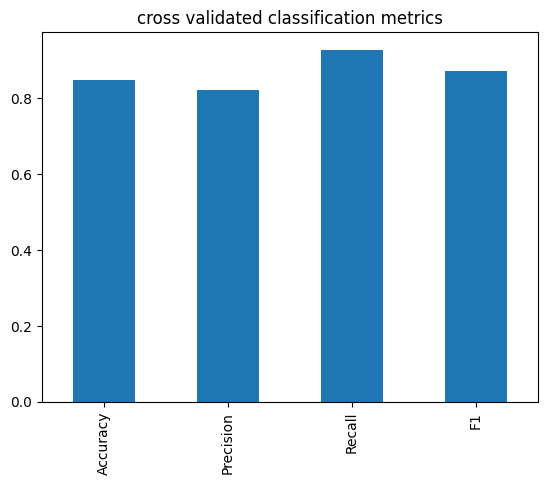

In [63]:
# plotting cross-validated classification metrics
cv_metrics = pd.DataFrame({"Accuracy":cv_acc,
                           "Precision":cv_precision,
                          "Recall":cv_recall,
                          "F1":cv_f1score},
                         index=[0])
cv_metrics.T.plot.bar(title="cross validated classification metrics",
                     legend=False);

## feature importance 

In [65]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [66]:
classifier = LogisticRegression(C=0.20433597178569418,
                               solver='liblinear')
classifier.fit(X_train,y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [67]:
classifier.coef_

array([[ 0.00316728, -0.86044654,  0.66067039, -0.01156993, -0.00166374,
         0.04386106,  0.3127585 ,  0.02459361, -0.60413082, -0.56862801,
         0.45051629, -0.63609898, -0.67663371]])

In [68]:
feature_dict = dict(zip(df.columns,list(classifier.coef_[0])))
feature_dict

{'age': 0.0031672803473471746,
 'sex': -0.8604465397334717,
 'cp': 0.6606703933230701,
 'trestbps': -0.011569932224142465,
 'chol': -0.0016637439444753457,
 'fbs': 0.043861055458486765,
 'restecg': 0.31275849953638685,
 'thalach': 0.0245936131980898,
 'exang': -0.604130820900716,
 'oldpeak': -0.5686280121446481,
 'slope': 0.45051628712277775,
 'ca': -0.6360989818014864,
 'thal': -0.6766337106855729}

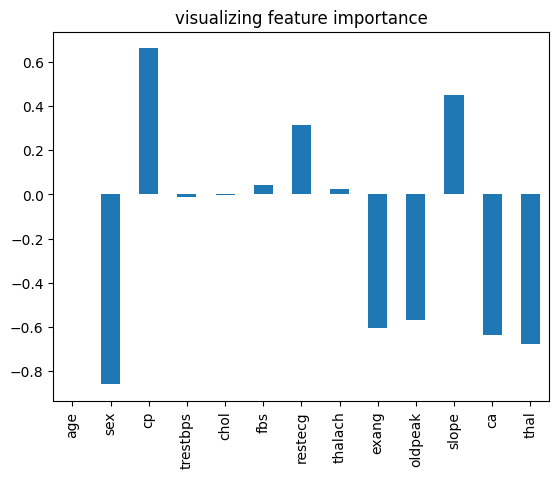

In [70]:
# visualize feature importance
feature_df = pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title="visualizing feature importance",legend=False);